# Objective of the Project

To predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for....

## Data Source

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

## Data Dictionary:

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

   * Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
   * Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
   * Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing our data
df=pd.read_csv(r"C:\Users\asus\Desktop\pro1\2nd Project (Bulldozer Price)\bluebook-for-bulldozers\TrainAndValid.csv",
               low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

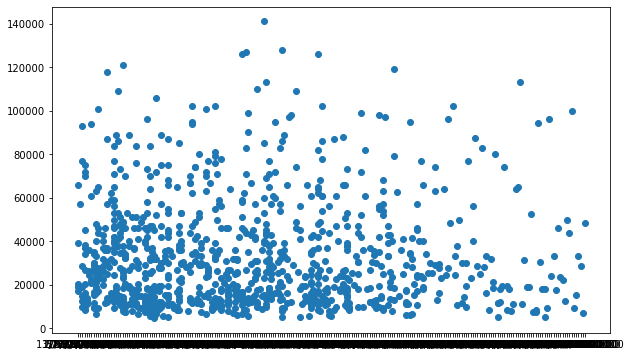

In [6]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

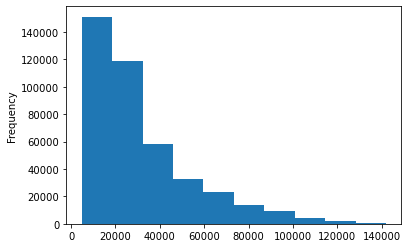

In [7]:
df['SalePrice'].plot.hist();

## Parsing Dates

In [8]:
df=pd.read_csv(r"C:\Users\asus\Desktop\pro1\2nd Project (Bulldozer Price)\bluebook-for-bulldozers\TrainAndValid.csv",
               low_memory=False,
              parse_dates=['saledate'])

In [9]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

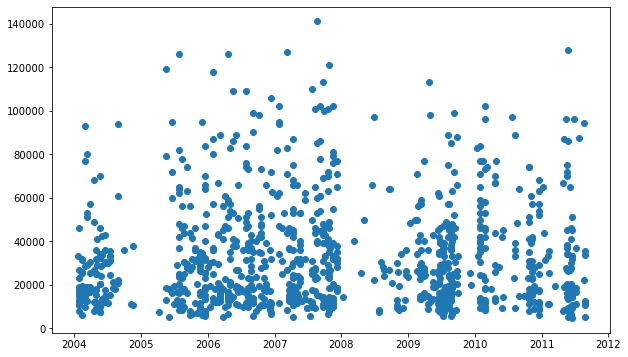

In [10]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [11]:
#sorting our data by saledate

df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
# We will make a copy of our dataframe
df_tmp=df.copy()


## Feature Engineering

#### using pandas Datetime attributes 
....to extract year,month,day,time, etc.. from date format (pandas)

In [13]:
#extract the year
df_tmp['saleYear']=df_tmp['saledate'].dt.year
#extract the month
df_tmp['saleMonth']=df_tmp['saledate'].dt.month
#extract the day
df_tmp['saleDay']=df_tmp['saledate'].dt.day
#extract sale day of week
df_tmp['saleDayOfWeek']=df_tmp['saledate'].dt.dayofweek
#extract sale day of year
df_tmp['saleDayOfYear']=df_tmp['saledate'].dt.dayofyear

df_tmp.head().transpose()

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [14]:
#Now , we can delete the saledate column:::
df_tmp.drop('saledate',axis=1,inplace=True)

In [15]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


### Converting String data type to Category data type

pandas has another data type called as categorical data type

In [16]:
#lets find and convert all string data typed columns into categories
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content): #checks if the data type is string
        df_tmp[label]=content.astype('category').cat.as_ordered() #if it is string it gets converted to category
                                                #ordered manner according to the alphabets

In [17]:
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [18]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [19]:
df_tmp.head().transpose()

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Lets export these preprocessed data first and we will proceed further

In [20]:
df_tmp.to_csv(r"C:\Users\asus\Desktop\pro1\2nd Project (Bulldozer Price)\bluebook-for-bulldozers\prepro_tmp.csv"
             ,index=False)

In [21]:
df_xtmp = pd.read_csv(r"C:\Users\asus\Desktop\pro1\2nd Project (Bulldozer Price)\bluebook-for-bulldozers\prepro_tmp.csv"
                     ,low_memory=False)

## Filling Missing Values

### Filling missing numeric values first

In [22]:
for label,content in df_xtmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_xtmp[label+'_is_missing'] = pd.isnull(content)
            df_xtmp[label] = content.fillna(content.median())

### Filling missing categorical values

In [23]:
for label,content in df_xtmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_xtmp[label+'_is_missing'] = pd.isnull(content)
        df_xtmp[label] = pd.Categorical(content).codes + 1

## Modelling

In [24]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1
                             ,random_state=42)
model.fit(df_xtmp.drop('SalePrice',axis=1),df_xtmp['SalePrice'])

CPU times: total: 46min 34s
Wall time: 4min 14s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [25]:
model.score(df_xtmp.drop('SalePrice',axis=1),df_xtmp['SalePrice'])

0.9875468079970562

In [26]:
#lets split data into train and validation 
df_val=df_xtmp[df_xtmp['saleYear'] == 2012]

df_train=df_xtmp[df_xtmp['saleYear'] != 2012]

In [27]:
#lets create x and y splits of our data
x_train=df_train.drop('SalePrice',axis=1)
y_train=df_train['SalePrice']

x_val=df_val.drop('SalePrice',axis=1)
y_val=df_val['SalePrice']

## Evaluating

In [28]:
from sklearn.metrics import mean_absolute_error , mean_squared_log_error ,r2_score

def rmsle(y_test,y_pred):
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

def show_scores(model):
    train_pred=model.predict(x_train)
    val_pred=model.predict(x_val)
    scores={"Training MAE":mean_absolute_error(y_train,train_pred)
           ,"Validation MAE":mean_absolute_error(y_val,val_pred)
           ,"Training RMSLE":rmsle(y_train,train_pred)
           ,"Validation RMSLE":rmsle(y_val,val_pred)
           ,"Training R2":r2_score(y_train,train_pred)
           ,"Validation R2":r2_score(y_val,val_pred)}
    return scores

In [29]:
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [30]:
#changing max_samples value for better scores
model=RandomForestRegressor(n_jobs=-1
                             ,random_state=42
                           ,max_samples=10000)
model.fit(df_xtmp.drop('SalePrice',axis=1),df_xtmp['SalePrice'])

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [31]:
show_scores(model)

{'Training MAE': 5565.22202000374,
 'Validation MAE': 6743.14913782079,
 'Training RMSLE': 0.25785327238429423,
 'Validation RMSLE': 0.28050463296404965,
 'Training R2': 0.8605758922555922,
 'Validation R2': 0.8523361364768458}

## Hyperparamater Tuning 
.....using RandomizedSearchCV

In [32]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 22.2 s
Wall time: 26.3 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [33]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [34]:
show_scores(rs_model)

{'Training MAE': 13359.14056765211,
 'Validation MAE': 15220.764304976754,
 'Training RMSLE': 0.5676114514616786,
 'Validation RMSLE': 0.5717673164701037,
 'Training R2': 0.35488807930807986,
 'Validation R2': 0.35826036720377497}

In [35]:
best_model=RandomForestRegressor(n_estimators= 70,
                                 min_samples_split= 10,
                                 min_samples_leaf= 9,
                                 max_samples= None,
                                 n_jobs=-1,
                                 max_features= 'sqrt',
                                 max_depth= 10,
                                random_state=42)
best_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=9,
                      min_samples_split=10, n_estimators=70, n_jobs=-1,
                      random_state=42)

In [36]:
show_scores(best_model)

{'Training MAE': 8789.718217453328,
 'Validation MAE': 10063.315289571749,
 'Training RMSLE': 0.38716299852855524,
 'Validation RMSLE': 0.40234570175141326,
 'Training R2': 0.6943148457320962,
 'Validation R2': 0.709031386068389}

In [37]:
#import the test data
df_test=pd.read_csv(r"C:\Users\asus\Desktop\pro1\2nd Project (Bulldozer Price)\bluebook-for-bulldozers\Test.csv"
                    ,low_memory=False,
                   parse_dates=['saledate'])

In [38]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Our test data is different than the trained data...So we will convert the test data format to match the train data format

In [39]:
def preprocess_data(df_test):
    df_test['saleYear']=df_test['saledate'].dt.year
    df_test['saleMonth']=df_test['saledate'].dt.month
    df_test['saleDay']=df_test['saledate'].dt.day
    df_test['saleDayOfWeek']=df_test['saledate'].dt.dayofweek
    df_test['saleDayOfYear']=df_test['saledate'].dt.dayofyear
    
    df_test.drop('saledate',axis=1,inplace=True)
    
    #fill the missing numeric rows
    
    for label,content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+'_is_missing'] = pd.isnull(content)
                df_test[label] = content.fillna(content.median())
    
    #fill categorical missing data
    
    for label,content in df_test.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label+'_is_missing'] = pd.isnull(content)
            df_test[label] = pd.Categorical(content).codes + 1
    
    return df_test

### Now the columns of test data and train data are still different...We should find which column is different or missing in either cases

In [40]:
set(x_train.columns) - set(df_test.columns)

{'Backhoe_Mounting_is_missing',
 'Blade_Extension_is_missing',
 'Blade_Type_is_missing',
 'Blade_Width_is_missing',
 'Coupler_System_is_missing',
 'Coupler_is_missing',
 'Differential_Type_is_missing',
 'Drive_System_is_missing',
 'Enclosure_Type_is_missing',
 'Enclosure_is_missing',
 'Engine_Horsepower_is_missing',
 'Forks_is_missing',
 'Grouser_Tracks_is_missing',
 'Grouser_Type_is_missing',
 'Hydraulics_Flow_is_missing',
 'Hydraulics_is_missing',
 'MachineHoursCurrentMeter_is_missing',
 'Pad_Type_is_missing',
 'Pattern_Changer_is_missing',
 'ProductGroupDesc_is_missing',
 'ProductGroup_is_missing',
 'ProductSize_is_missing',
 'Pushblock_is_missing',
 'Ride_Control_is_missing',
 'Ripper_is_missing',
 'Scarifier_is_missing',
 'Steering_Controls_is_missing',
 'Stick_Length_is_missing',
 'Stick_is_missing',
 'Thumb_is_missing',
 'Tip_Control_is_missing',
 'Tire_Size_is_missing',
 'Track_Type_is_missing',
 'Transmission_is_missing',
 'Travel_Controls_is_missing',
 'Turbocharged_is_missin

In [41]:
preprocess_data(df_test)


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [42]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [43]:
#since we got minimum errors in baseline model:::
test_pred=model.predict(df_test)

C:\Users\asus\Desktop\pro1\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [44]:
test_pred

array([19382.5, 27866. , 54892.5, ..., 13494. , 15752.5, 25705. ])

In [45]:
df_pred=pd.DataFrame()
df_pred["SalesID"]=df_test["SalesID"]
df_pred["SalesPrice"]=test_pred
df_pred

,SalesID,SalesPrice
0,1227829,19382.5
1,1227844,27866.0
2,1227847,54892.5
3,1227848,79425.0
4,1227863,38690.0
...,...,...
12452,6643171,50666.0
12453,6643173,13121.5
12454,6643184,13494.0
12455,6643186,15752.5


## Feature Importance

In [46]:
model.feature_importances_

array([4.69920325e-02, 2.23426104e-02, 2.94635244e-02, 1.04633034e-03,
       5.81336268e-03, 2.51162148e-01, 4.42036635e-03, 1.60551787e-03,
       2.51663893e-02, 4.79985617e-02, 6.09986743e-02, 3.99515368e-03,
       6.70214173e-03, 2.18551875e-01, 3.06718105e-02, 1.15281623e-02,
       1.66350907e-03, 1.57544367e-03, 1.44161597e-03, 1.90762488e-02,
       6.73996580e-04, 7.20811260e-05, 1.48790059e-03, 2.39503555e-04,
       1.21571366e-03, 6.91746412e-05, 1.19455299e-03, 2.03540409e-02,
       5.48015632e-04, 1.21662772e-03, 3.75135688e-03, 3.84691281e-03,
       3.18426900e-03, 1.15574523e-03, 5.28557416e-04, 4.97164366e-03,
       1.43459191e-03, 1.49485521e-02, 6.81684564e-04, 1.02232454e-03,
       2.05959156e-04, 1.32156002e-03, 1.62766582e-03, 9.12795866e-04,
       6.64270293e-04, 8.53286448e-04, 1.30575152e-04, 2.83382310e-03,
       1.14809983e-03, 2.19037766e-04, 2.15180976e-04, 6.36188002e-02,
       4.49551048e-03, 1.28996575e-02, 6.49451020e-03, 1.41287978e-02,
      

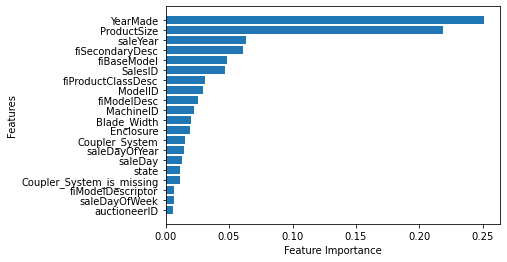

In [47]:
#plotting feature importances
df_plot= (pd.DataFrame({"features":x_train.columns,
                     "feature_importances":model.feature_importances_,})
                        .sort_values("feature_importances",ascending=False)
                        .reset_index(drop=True))
fig,ax=plt.subplots()
ax.barh(df_plot["features"][:20],df_plot["feature_importances"][:20])
ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance");
ax.invert_yaxis();

In [48]:
from joblib import dump,load
dump(model,filename="Bulldozer_price_prediction_model.joblib")

['Bulldozer_price_prediction_model.joblib']